<a href="https://colab.research.google.com/github/Gogonemnem/Safran-Project/blob/main/Visualization_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
!git clone https://github.com/Gogonemnem/Safran-Project

fatal: destination path 'Safran-Project' already exists and is not an empty directory.


## DATA LOADING

In [85]:
# Load the data
results = pd.read_csv("results.csv", sep=",")

### Different model configurations
Models:
* BERT
* AeroBot
* SafeAeroBERT
* Longformer

Configurations:
* Unfrozen 
* Abbreviated 
* Loss: BCE, BCE-Balanced, BinaryFocal, BinaryFocal-Balanced

Prediction set:
* Group
* Subcategory

Create indicators to select the model type and configuration

In [87]:
# Model indicator
def model_indic(x):
    if "SafeAeroBERT" in x:
        return "SafeAeroBERT"
    elif "longformer" in x:
        return "LongFormer"
    elif "AeroBOT_bert-base-uncased" in x:
        return "AeroBOT"
    else:
        return "BERT"

In [86]:
# Configuration indicator

# Layer configuration (frozen / unfrozen)
def frozen_config(x):
    if "Unfrozen" in x:
        return "unfrozen"
    else:
        return "frozen"


# Training data configuration (non-abbreviated / abbreviated)
def training_config(x):
    if "Abbreviated" in x:
        return "abbreviated"
    else:
        return "non-abbreviated"
    

# Loss configuration (BCE / FocalLoss / Balanced / Unbalanced)
def loss_config(x):
    if "BCE" in x:
        if "Balanced" in x:
            return "BCE_balanced"
        else: 
            return "BCE_unbalanced"
    else:
        if "Balanced" in x:
            return "FocalLoss_balanced"
        else: 
            return "FocalLoss_unbalanced"

In [88]:
# Prediction set indicator
def prediction_set(x):
    if "Subcategory" in x:
        return "subcategory"
    else: 
        return "group"

In [89]:
# Apply the indicators
results["Model"] = results["Model Name"].apply(model_indic)
results["Layer"] = results["Model Name"].apply(frozen_config)
results["Training_data"] = results["Model Name"].apply(training_config)
results["Loss"] = results["Model Name"].apply(loss_config)
results["Prediction_set"] = results["Model Name"].apply(prediction_set)

In [104]:
import re 

# Change model configuration names
def shorten_model_name(name):
    # Define regular expression patterns and their corresponding replacements
    patterns = [
        (r'AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE', 'AeroBOT'),
        (r'AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_Subcategory_BCE', 'AeroBOT_sub'),
        (r'NASA-AIML_MIKA_SafeAeroBERT', 'SafeAeroBERT'),
        (r'allenai_longformer-base-4096', 'Longformer'),
        (r'bert-base-uncased', 'BertBase'),
        (r'Unfrozen\[(.*?)\]', 'Unfrz'),
        (r'BCE-Balanced', 'BCEBal'),
        (r'BinaryFocal-Balanced', 'BinFocalBal'),
        (r'BCE', 'BCE'),
        (r'BinaryFocal', 'BinFocal'),
        (r'Abbreviated', 'Abbrv'),
    ]

    # Apply regular expression replacements
    for pattern, replacement in patterns:
        name = re.sub(pattern, replacement, name)

    return name

# # Obtain unique model configurations
# unique_categories =  results['Model Name'].unique()
# shortened_model_names = [shorten_model_name(name) for name in unique_categories]

# # Use model configurations for axis labels
# xticks = shortened_model_names

# Add column with short_names for plotting
results["Short_name"] = results['Model Name'].apply(shorten_model_name)

## Visualizations

In [181]:
# Function to filter the dataframe for specific models
def filter_results(training_data_list, loss_list, layer_list, prediction_set, category, results):
    filtered_df = results[
        (results["Training_data"].isin(training_data_list)) &
        (results["Loss"].isin(loss_list)) &
        (results["Layer"].isin(layer_list)) &
        (results["Prediction_set"] == prediction_set) &
        (results["Category"] == category)
    ].sort_values(by="f1-score")
    return filtered_df

In [183]:
# Function to filter the dataframe for specific models for the boxplot
def filter_boxplot(training_data_list, loss_list, layer_list, prediction_set, category_list, results):
    filtered_df = results[
        (results["Training_data"].isin(training_data_list)) &
        (results["Loss"].isin(loss_list)) &
        (results["Layer"].isin(layer_list)) &
        (results["Prediction_set"] == prediction_set) &
        (~results["Category"].isin(category_list))
    ].sort_values(by="f1-score")
    return filtered_df


In [205]:
results[results["Model"] == "AeroBOT"]['Model Name'].unique()

array(['AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE',
       'AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_Subcategory_BCE',
       'AeroBOT_bert-base-uncased_Subcategory_BCE',
       'AeroBOT_bert-base-uncased_BCE'], dtype=object)

In [208]:
# Select SAFRAN models
SAFRAN_model_group = results[results["Model Name"] == 'AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_BCE']

SAFRAN_model_subcategories = results[results["Model Name"] == 'AeroBOT_bert-base-uncased_Unfrozen[8, 9, 10, 11]_Subcategory_BCE']


In [131]:
# Design color palette for the different models
color_palette = sns.color_palette()
model_order = ["SafeAeroBERT", "LongFormer", "AeroBOT", "BERT"]
model_palette = {model: color_palette[index % len(color_palette)] for index, model in enumerate(model_order)}

color_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Abbreviations

In [108]:
# Abbreviations
filtered_abb = filter_results("abbreviated", ["BCE_balanced"], "unfrozen", "subcategory", "macro avg", results)

Safran_result = results[(results["Short_name"] == "AeroBOT_BertBase_Unfrz_BCE") & (results["Category"] == "macro avg")]

filtered_abb = pd.concat([filtered_abb, Safran_result], ignore_index=True)

x_values = filtered_abb["Short_name"]
print(x_values)
y_values = filtered_abb["f1-score"]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`

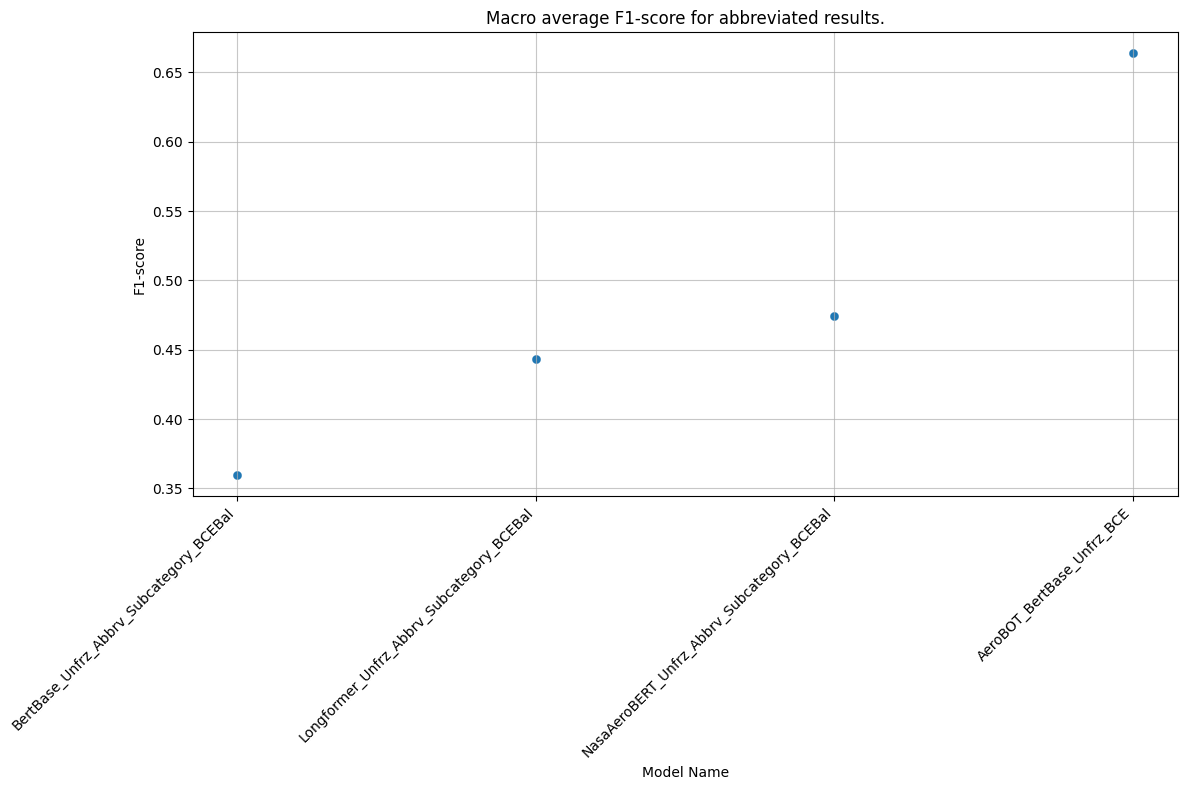

In [39]:
#########################
# Abbreviations plot
#########################

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for abbreviated results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [12]:
###########################
# Abbreviations violin plot
###########################

# Categories to exclude from plot
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']

# Filter results
filtered_boxplot = filter_boxplot("abbreviated", ["BCE_balanced"], "unfrozen", "group", category_list, results)
filtered_abb = filter_results("abbreviated", ["BCE_balanced"], "unfrozen", "group", "macro avg", results)

# Get unique model names for x-axis ticks
model_names = filtered_boxplot['Short_name'].unique().tolist()

# Plot
plt.figure(figsize=(8, 6))

# Violin plot
sns.violinplot(data=filtered_boxplot, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette='deep')
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)

plt.show()

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`

### Unfrozen

In [175]:
# Layers frozen or not

# Select baseline model and target models
filtered_unfrozen = filter_results("non-abbreviated", ["BCE_balanced"], "unfrozen", "subcategory", "macro avg", results)
#Safran_result = results[(results["Short_name"] == "AeroBOT_BertBase_Unfrz_BCE") & (results["Category"] == "macro avg")]
#filtered_unfrozen = pd.concat([filtered_unfrozen, Safran_result], ignore_index=True)

x_values = filtered_unfrozen["Short_name"]
print(x_values)
y_values = filtered_unfrozen["f1-score"]

639        BertBase_Unfrz_Subcategory_BCEBal
771      Longformer_Unfrz_Subcategory_BCEBal
705    NasaAeroBERT_Unfrz_Subcategory_BCEBal
Name: Short_name, dtype: object


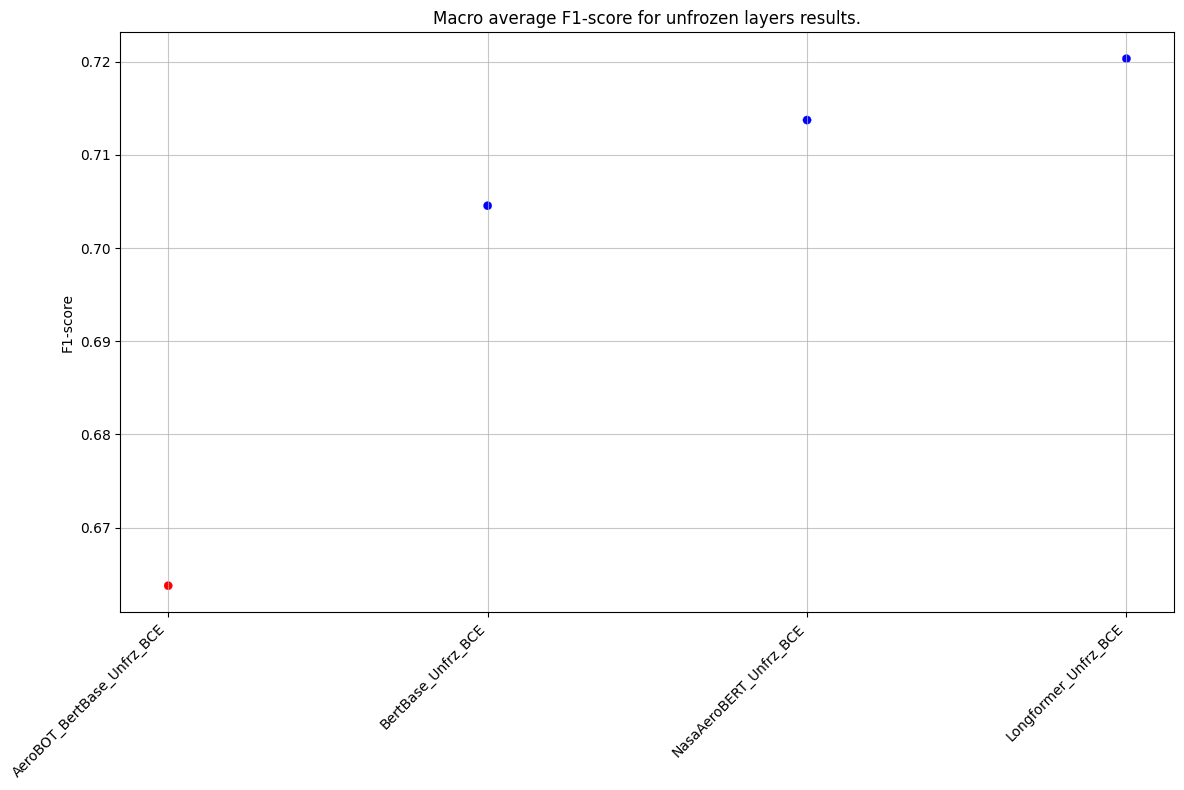

In [149]:
import matplotlib.pyplot as plt

colors = ['red' if x == 'AeroBOT_BertBase_Unfrz_BCE' else 'blue' for x in x_values]


# Abbreviations visualization
plt.figure(figsize=(12, 8))

# Scatter plot with customized colors
plt.scatter(range(len(x_values)), y_values, c=colors, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
#plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# UNFROZEN SECTION

* Compare baseline AeroBOT against alternatives with certain layers frozen or unfrozen

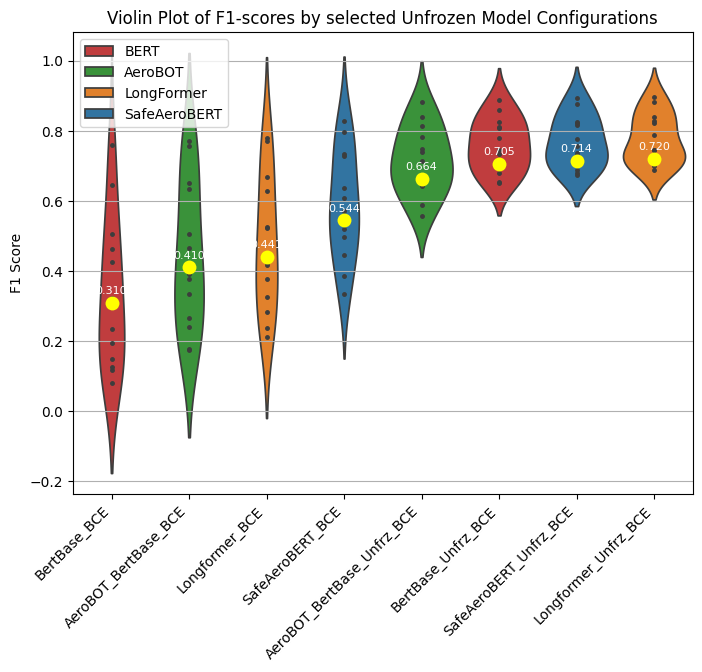

In [172]:
###########################
# Unfrozen violin plot
###########################

# Categories to exclude from plot
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']

# Filter results
filtered_boxplot = filter_boxplot(["non-abbreviated"], ["BCE_unbalanced"], ["unfrozen", "frozen"], "group", category_list, results)
filtered_abb = filter_results(["non-abbreviated"], ["BCE_unbalanced"], ["unfrozen", "frozen"], "group", "macro avg", results)

# Get unique model names for x-axis ticks
model_names = filtered_boxplot['Short_name'].unique().tolist()

# Plot
plt.figure(figsize=(8, 6))

# Violin plot
#sns.violinplot(data=filtered_boxplot, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette='deep')
sns.violinplot(data=filtered_boxplot, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette=model_palette, hue='Model')


plt.title('Violin Plot of F1-scores by selected Unfrozen Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb)):
    plt.text(filtered_abb.iloc[i]['Model Name'], filtered_abb.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()

# LOSS SECTION

* Compare baseline AeroBOT against alternatives with the following losses: BinaryCrossEntropy + FocalLoss

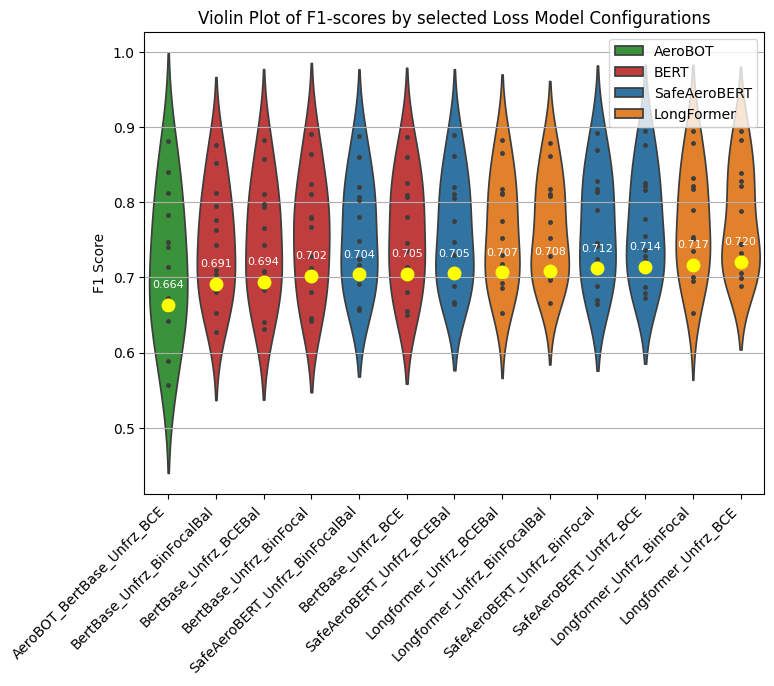

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting model configurations
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']
loss_list = ["BCE_unbalanced", "BCE_balanced", "FocalLoss_unbalanced", "FocalLoss_balanced"]


# Filter results
results2 = results.sort_values(by='f1-score')
filtered_loss = filter_boxplot(["non-abbreviated"], loss_list , ["unfrozen"], "group", category_list, results2)
filtered_abb = filter_results(["non-abbreviated"], loss_list, ["unfrozen"], "group", "macro avg", results)

# Sort filtered_loss based on 'f1-score' in ascending order
#filtered_loss_sorted = filtered_loss.sort_values(by='f1-score')
filtered_abb_sorted = filtered_abb.sort_values(by='f1-score')


# Get unique values of 'Model Name' column from filtered_abb_sorted
unique_model_names = filtered_abb_sorted['Model Name'].unique()

# Create a dictionary mapping model names to their order index
model_name_order = {name: index for index, name in enumerate(unique_model_names)}

# Add a new column to filtered_loss_sorted with the order index of the model names
filtered_loss['Model Name Order'] = filtered_loss['Model Name'].map(model_name_order)

# Sort filtered_loss_sorted by the 'Model Name Order' column
filtered_loss_sorted = filtered_loss.sort_values(by='Model Name Order')

# Remove the 'Model Name Order' column if desired
filtered_loss_sorted.drop(columns=['Model Name Order'], inplace=True)

# Get unique model names for x-axis ticks
model_names = filtered_loss_sorted['Short_name'].unique().tolist()

plt.figure(figsize=(8, 6))
# Violin plot with hue set to 'Model' and using filtered_loss_sorted data
sns.violinplot(data=filtered_loss_sorted, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette=model_palette, hue='Model')
plt.title('Violin Plot of F1-scores by selected Loss Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb_sorted)):
    plt.text(filtered_abb_sorted.iloc[i]['Model Name'], filtered_abb_sorted.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb_sorted.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb_sorted, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()


# ABBREVIATIONS SECTION

* Compare baseline AeroBOT against alternatives with two sets of training data, with and without abbreviations


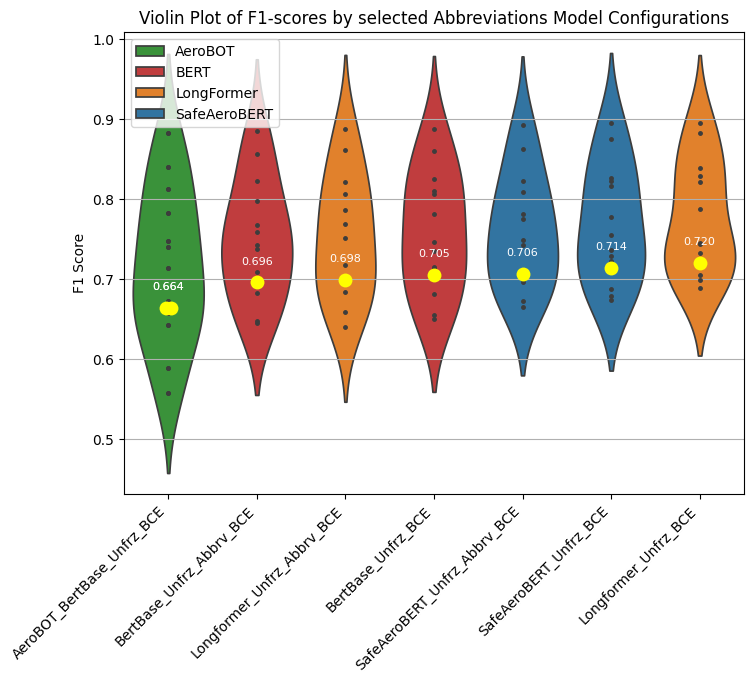

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting model configurations
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']
loss_list = ["BCE_unbalanced"]


# Filter results
results2 = results.sort_values(by='f1-score')

# Concatenate baseline dataframe and selected models (1) without certain categories (2) with only macro average
filtered_loss = pd.concat([filter_boxplot(["non-abbreviated", "abbreviated"], loss_list, ["unfrozen"], "group", category_list, SAFRAN_model_group), 
                                          filter_boxplot(["non-abbreviated", "abbreviated"], loss_list , ["unfrozen"], "group", category_list, results2)])

filtered_abb = pd.concat([SAFRAN_model_group[SAFRAN_model_group['Category'] == "macro avg"],
                          filter_results(["non-abbreviated", "abbreviated"], loss_list, ["unfrozen"], "group", "macro avg", results)])

# Sort filtered_loss based on 'f1-score' in ascending order
#filtered_loss_sorted = filtered_loss.sort_values(by='f1-score')
filtered_abb_sorted = filtered_abb.sort_values(by='f1-score')



# Get unique values of 'Model Name' column from filtered_abb_sorted
unique_model_names = filtered_abb_sorted['Model Name'].unique()

# Create a dictionary mapping model names to their order index
model_name_order = {name: index for index, name in enumerate(unique_model_names)}

# Add a new column to filtered_loss_sorted with the order index of the model names
filtered_loss['Model Name Order'] = filtered_loss['Model Name'].map(model_name_order)

# Sort filtered_loss_sorted by the 'Model Name Order' column
filtered_loss_sorted = filtered_loss.sort_values(by='Model Name Order')

# Remove the 'Model Name Order' column if desired
filtered_loss_sorted.drop(columns=['Model Name Order'], inplace=True)

# Get unique model names for x-axis ticks
model_names = filtered_loss_sorted['Short_name'].unique().tolist()



plt.figure(figsize=(8, 6))
# Violin plot with hue set to 'Model' and using filtered_loss_sorted data
sns.violinplot(data=filtered_loss_sorted, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette=model_palette, hue='Model')
plt.title('Violin Plot of F1-scores by selected Abbreviations Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb_sorted)):
    plt.text(filtered_abb_sorted.iloc[i]['Model Name'], filtered_abb_sorted.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb_sorted.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb_sorted, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()


# SUBCATEGORIES SECTION

* Compare baseline AeroBOT against alternatives with certain layers frozen or unfrozen

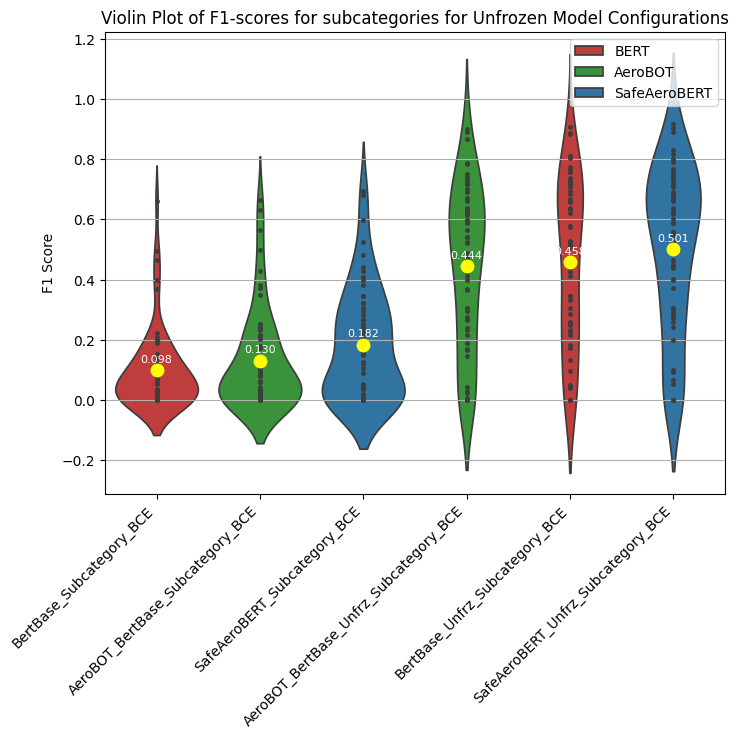

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting model configurations
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']
loss_list = ["BCE_unbalanced"]


# Filter results
results2 = results.sort_values(by='f1-score')

# Concatenate baseline dataframe and selected models (1) without certain categories (2) with only macro average
filtered_boxplot = filter_boxplot(["non-abbreviated"], ["BCE_unbalanced"], ["unfrozen", "frozen"], "subcategory", category_list, results)
filtered_abb = filter_results(["non-abbreviated"], ["BCE_unbalanced"], ["unfrozen", "frozen"], "subcategory", "macro avg", results)

# Sort filtered_loss based on 'f1-score' in ascending order
#filtered_loss_sorted = filtered_loss.sort_values(by='f1-score')
filtered_abb_sorted = filtered_abb.sort_values(by='f1-score')



# Get unique values of 'Model Name' column from filtered_abb_sorted
unique_model_names = filtered_abb_sorted['Model Name'].unique()

# Create a dictionary mapping model names to their order index
model_name_order = {name: index for index, name in enumerate(unique_model_names)}

# Add a new column to filtered_loss_sorted with the order index of the model names
filtered_boxplot['Model Name Order'] = filtered_boxplot['Model Name'].map(model_name_order)

# Sort filtered_loss_sorted by the 'Model Name Order' column
filtered_boxplot_sorted = filtered_boxplot.sort_values(by='Model Name Order')

# Remove the 'Model Name Order' column if desired
filtered_boxplot_sorted.drop(columns=['Model Name Order'], inplace=True)

# Get unique model names for x-axis ticks
model_names = filtered_boxplot_sorted['Short_name'].unique().tolist()



plt.figure(figsize=(8, 6))
# Violin plot with hue set to 'Model' and using filtered_loss_sorted data
sns.violinplot(data=filtered_boxplot_sorted, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette=model_palette, hue='Model')
plt.title('Violin Plot of F1-scores for subcategories for Unfrozen Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb_sorted)):
    plt.text(filtered_abb_sorted.iloc[i]['Model Name'], filtered_abb_sorted.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb_sorted.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb_sorted, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()


* Compare baseline AeroBOT against alternatives with the following losses: BinaryCrossEntropy + FocalLoss

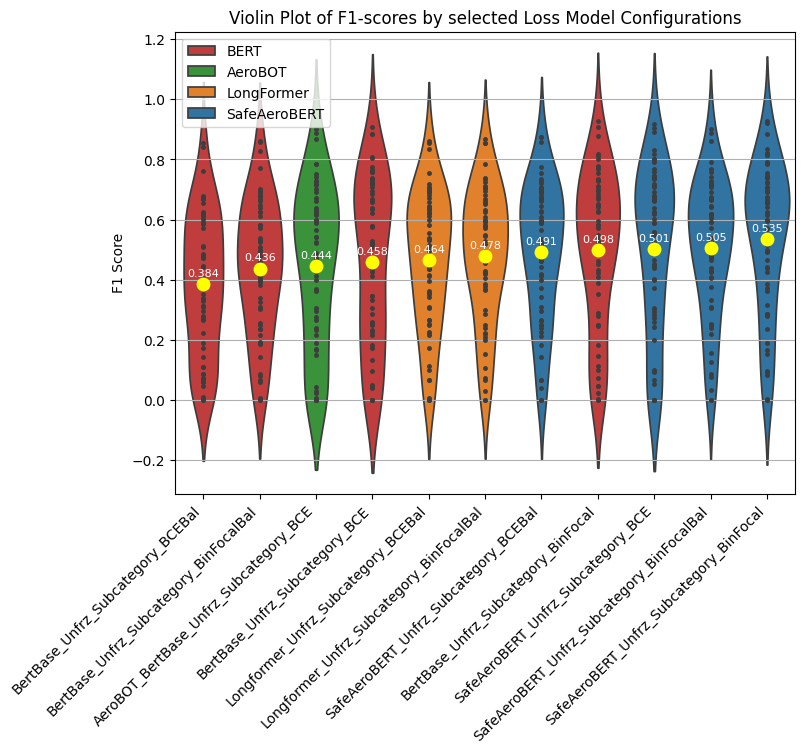

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting model configurations
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']
loss_list = ["BCE_unbalanced", "BCE_balanced", "FocalLoss_unbalanced", "FocalLoss_balanced"]


# Filter results
results2 = results.sort_values(by='f1-score')
filtered_loss = filter_boxplot(["non-abbreviated"], loss_list , ["unfrozen"], "subcategory", category_list, results2)
filtered_abb = filter_results(["non-abbreviated"], loss_list, ["unfrozen"], "subcategory", "macro avg", results)

# Sort filtered_loss based on 'f1-score' in ascending order
#filtered_loss_sorted = filtered_loss.sort_values(by='f1-score')
filtered_abb_sorted = filtered_abb.sort_values(by='f1-score')


# Get unique values of 'Model Name' column from filtered_abb_sorted
unique_model_names = filtered_abb_sorted['Model Name'].unique()

# Create a dictionary mapping model names to their order index
model_name_order = {name: index for index, name in enumerate(unique_model_names)}

# Add a new column to filtered_loss_sorted with the order index of the model names
filtered_loss['Model Name Order'] = filtered_loss['Model Name'].map(model_name_order)

# Sort filtered_loss_sorted by the 'Model Name Order' column
filtered_loss_sorted = filtered_loss.sort_values(by='Model Name Order')

# Remove the 'Model Name Order' column if desired
filtered_loss_sorted.drop(columns=['Model Name Order'], inplace=True)

# Get unique model names for x-axis ticks
model_names = filtered_loss_sorted['Short_name'].unique().tolist()

plt.figure(figsize=(8, 6))
# Violin plot with hue set to 'Model' and using filtered_loss_sorted data
sns.violinplot(data=filtered_loss_sorted, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette=model_palette, hue='Model')
plt.title('Violin Plot of F1-scores for subcategories by selected Loss Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb_sorted)):
    plt.text(filtered_abb_sorted.iloc[i]['Model Name'], filtered_abb_sorted.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb_sorted.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb_sorted, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()


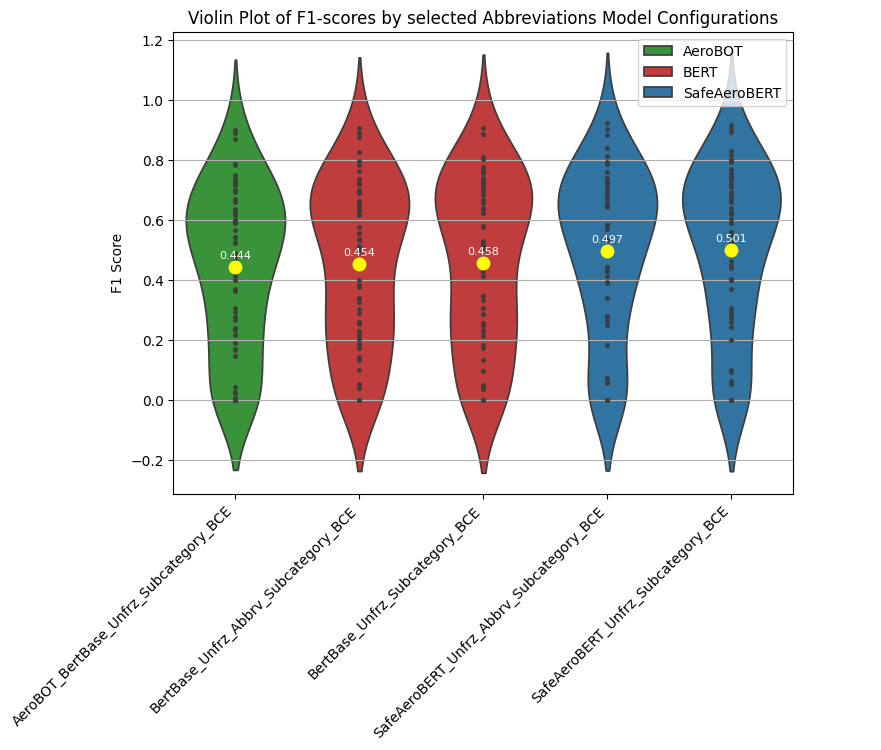

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting model configurations
category_list = ['micro avg', 'weighted avg', 'macro avg', 'samples avg', 'No Specific Anomaly Occurred']
loss_list = ["BCE_unbalanced"]


# Filter results
results2 = results.sort_values(by='f1-score')

# Concatenate baseline dataframe and selected models (1) without certain categories (2) with only macro average
filtered_loss = pd.concat([filter_boxplot(["non-abbreviated", "abbreviated"], loss_list, ["unfrozen"], "subcategory", category_list, SAFRAN_model_group), 
                                          filter_boxplot(["non-abbreviated", "abbreviated"], loss_list , ["unfrozen"], "subcategory", category_list, results2)])

filtered_abb = pd.concat([SAFRAN_model_group[SAFRAN_model_group['Category'] == "macro avg"],
                          filter_results(["non-abbreviated", "abbreviated"], loss_list, ["unfrozen"], "subcategory", "macro avg", results)])

# Sort filtered_loss based on 'f1-score' in ascending order
#filtered_loss_sorted = filtered_loss.sort_values(by='f1-score')
filtered_abb_sorted = filtered_abb.sort_values(by='f1-score')



# Get unique values of 'Model Name' column from filtered_abb_sorted
unique_model_names = filtered_abb_sorted['Model Name'].unique()

# Create a dictionary mapping model names to their order index
model_name_order = {name: index for index, name in enumerate(unique_model_names)}

# Add a new column to filtered_loss_sorted with the order index of the model names
filtered_loss['Model Name Order'] = filtered_loss['Model Name'].map(model_name_order)

# Sort filtered_loss_sorted by the 'Model Name Order' column
filtered_loss_sorted = filtered_loss.sort_values(by='Model Name Order')

# Remove the 'Model Name Order' column if desired
filtered_loss_sorted.drop(columns=['Model Name Order'], inplace=True)

# Get unique model names for x-axis ticks
model_names = filtered_loss_sorted['Short_name'].unique().tolist()



plt.figure(figsize=(8, 6))
# Violin plot with hue set to 'Model' and using filtered_loss_sorted data
sns.violinplot(data=filtered_loss_sorted, x="Model Name", y="f1-score", inner="points", saturation=0.75, palette=model_palette, hue='Model')
plt.title('Violin Plot of F1-scores by selected Abbreviations Model Configurations')
plt.ylabel('F1 Score')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Iterate over the data points and add text annotations
for i in range(len(filtered_abb_sorted)):
    plt.text(filtered_abb_sorted.iloc[i]['Model Name'], filtered_abb_sorted.iloc[i]['f1-score'] + 0.02, 
             f"{filtered_abb_sorted.iloc[i]['f1-score']:.3f}", ha='center', va='bottom', fontsize=8, color='white')

plt.grid()

# Add stripplot
sns.stripplot(data=filtered_abb_sorted, x="Model Name", y="f1-score", color='yellow', size=10, jitter=True)
plt.xlabel('')
plt.show()


In [177]:
# Loss BCE, FocalLoss, balanced, or unbalanced
#loss = ["BCE_balanced", "BCE_unbalanced", "FocalLoss_balanced", "FocalLoss_unbalanced"]
loss = ["BCE_unbalanced", "FocalLoss_unbalanced"]

filtered_loss = filter_results("non-abbreviated", loss, "unfrozen", "subcategory", "macro avg", results)

x_values = filtered_loss["Short_name"]
y_values = filtered_loss["f1-score"]

x_values


1611    AeroBOT_BertBase_Unfrz_Subcategory_BCE
Name: Short_name, dtype: object

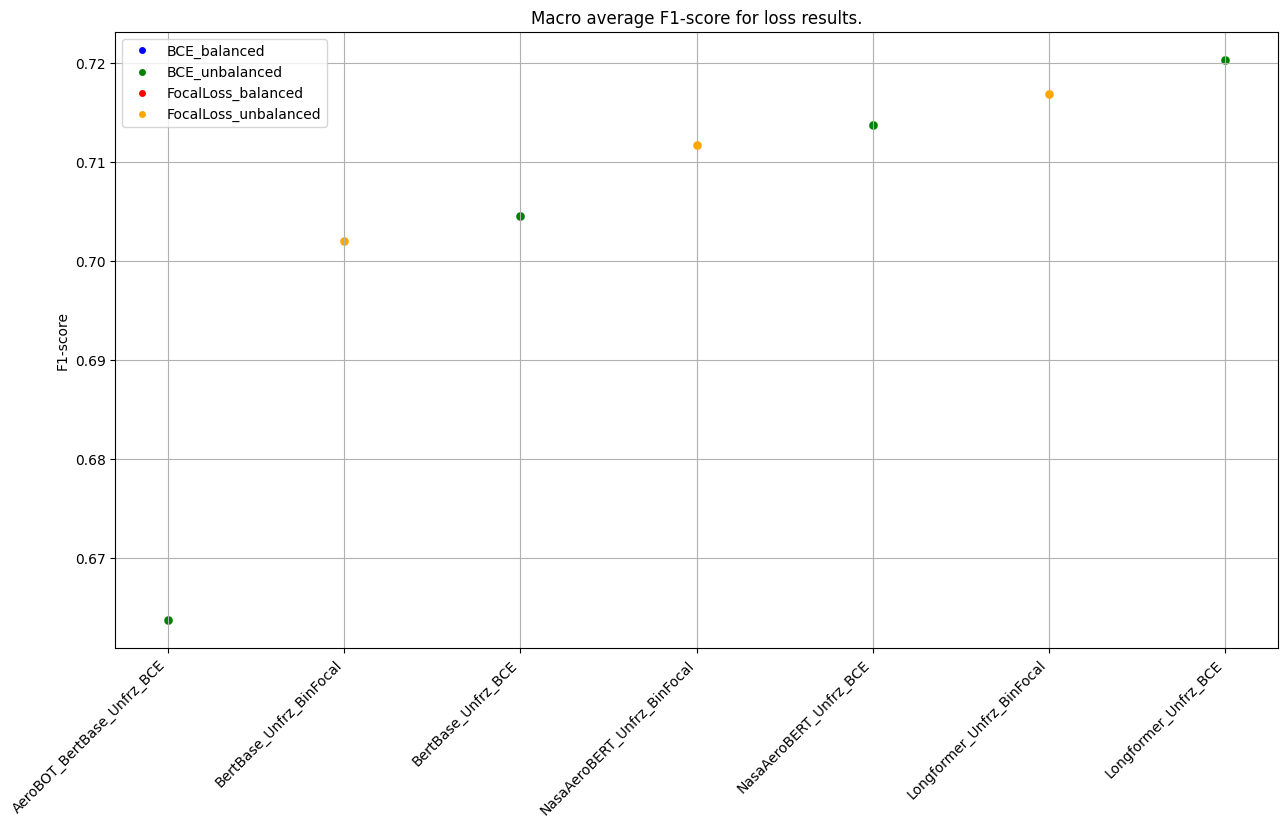

In [155]:
# Loss types
x_values = filtered_loss["Short_name"]
y_values = filtered_loss["f1-score"]
loss_types = filtered_loss["Loss"]

# Create a color map based on loss types
color_map = {
    "BCE_balanced": "blue",
    "BCE_unbalanced": "green",
    "FocalLoss_balanced": "red",
    "FocalLoss_unbalanced": "orange"
}

# Abbreviations visualization 
plt.figure(figsize=(15, 8))

# Scatter plot with different colors based on loss type
for x, y, loss_type in zip(x_values, y_values, loss_types):
    plt.scatter(x, y, color=color_map[loss_type], marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
#plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for loss results.')
plt.grid()

# Add legend based on color map
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label)
                  for label, color in color_map.items()]
plt.legend(handles=legend_handles)

# Show plot
plt.show()


### Direct Model Comparison


In [186]:
# Loss BCE, FocalLoss, balanced, or unbalanced
#filtered_model = results[(results["Model"] == "BERT") & (results["Category"] == "macro avg")].sort_values(by="f1-score")
filtered_models = results[((results["Model"] == "SafeAeroBERT") | (results["Model"] == "LongFormer")) & (results["Category"] == "macro avg")].sort_values(by="f1-score")
x_values = filtered_models["Short_name"]
y_values = filtered_models["f1-score"]

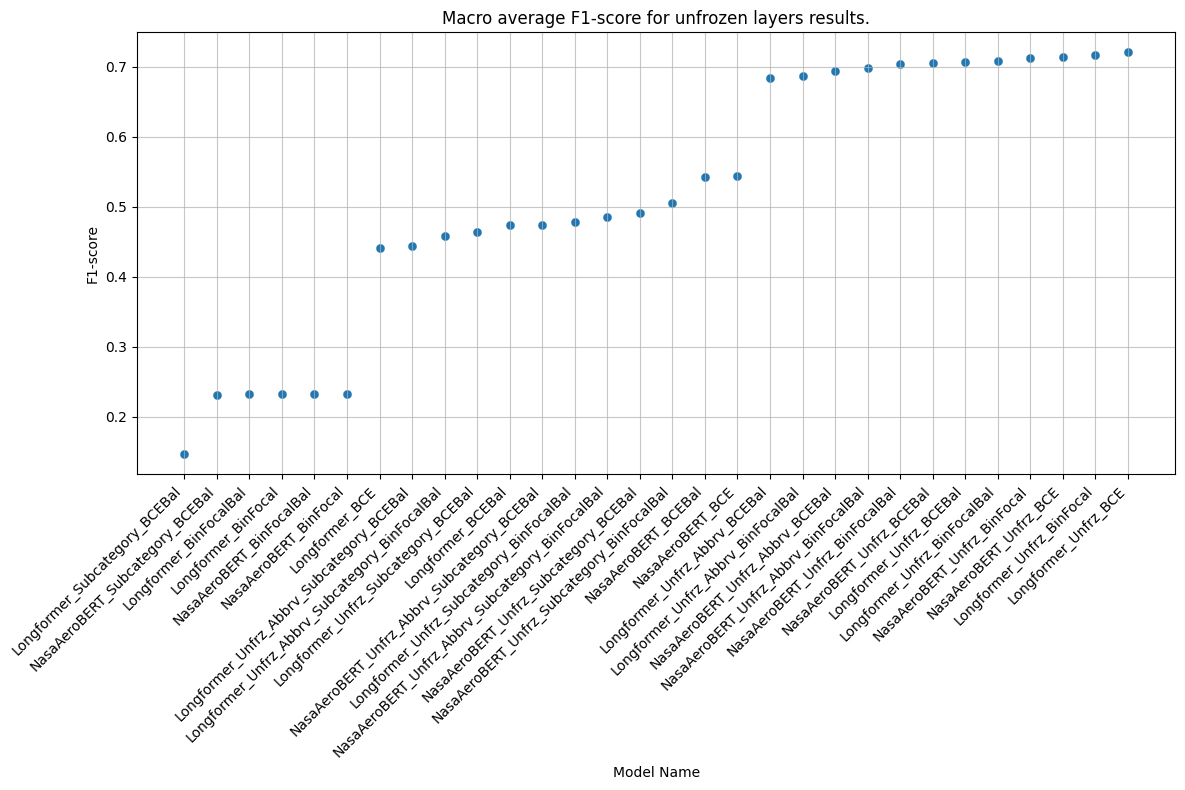

In [187]:
# Loss BCE, FocalLoss, balanced, or unbalanced
#filtered_model = results[(results["Model"] == "BERT") & (results["Category"] == "macro avg")].sort_values(by="f1-score")
filtered_models = results[((results["Model"] == "SafeAeroBERT") | (results["Model"] == "LongFormer")) & (results["Category"] == "macro avg")].sort_values(by="f1-score")
x_values = filtered_models["Short_name"]
y_values = filtered_models["f1-score"]

# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

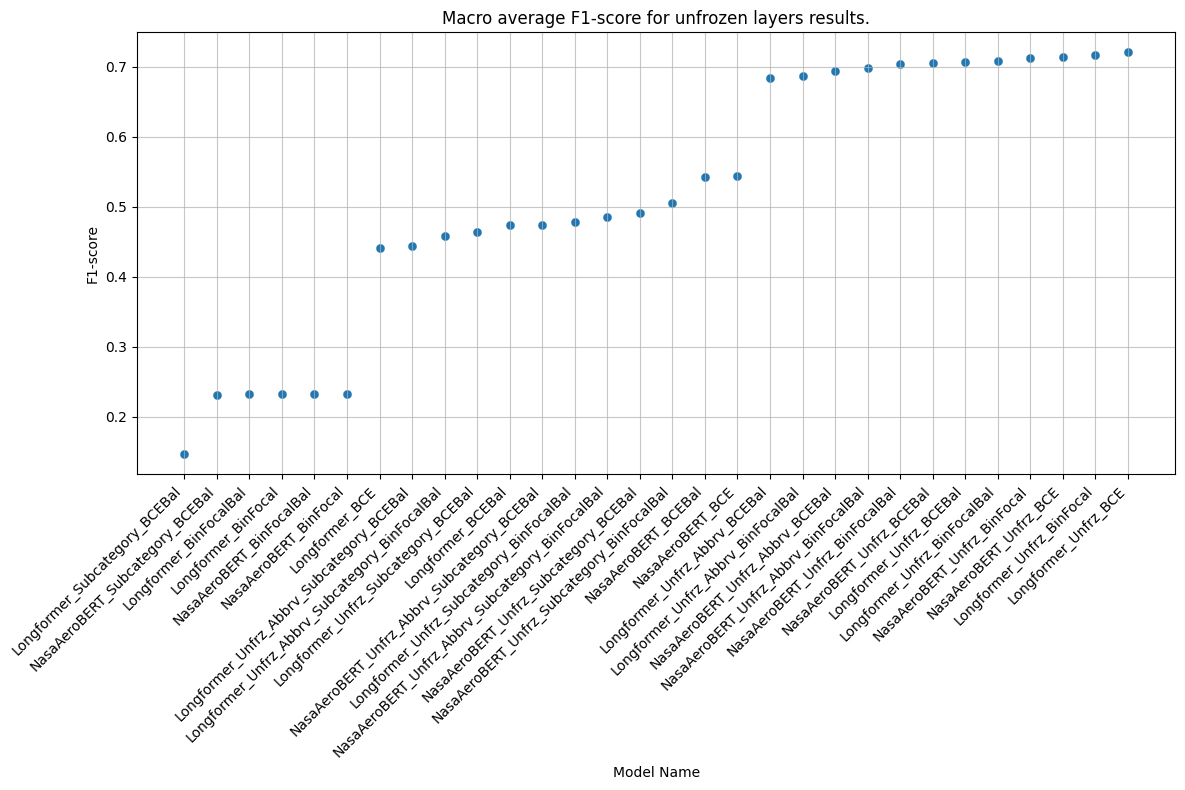

In [185]:
# Loss BCE, FocalLoss, balanced, or unbalanced
# filtered_model = results[(results["Model"] == "BERT") & (results["Category"] == "macro avg")].sort_values(by="f1-score")
# x_values = filtered_model["Short_name"]
# y_values = filtered_model["f1-score"]

# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

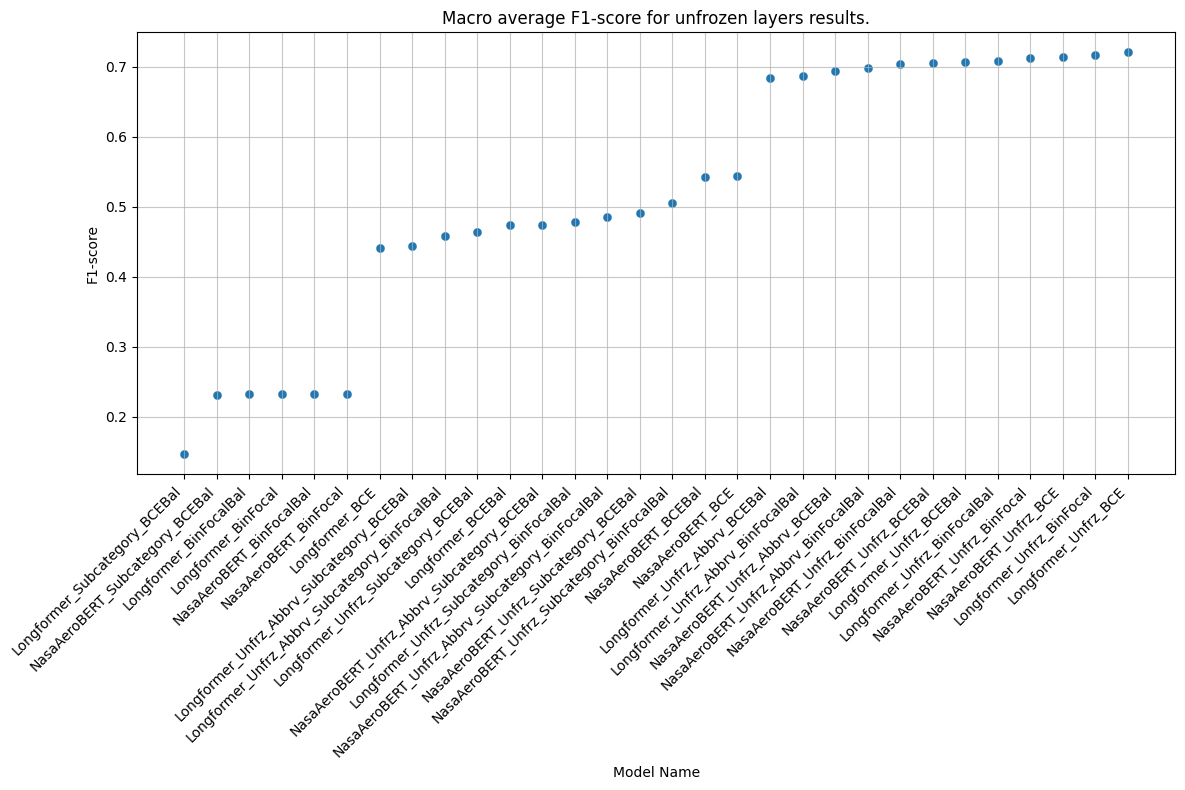

In [179]:
# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(x_values, y_values, marker='o', linewidths=0.2)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

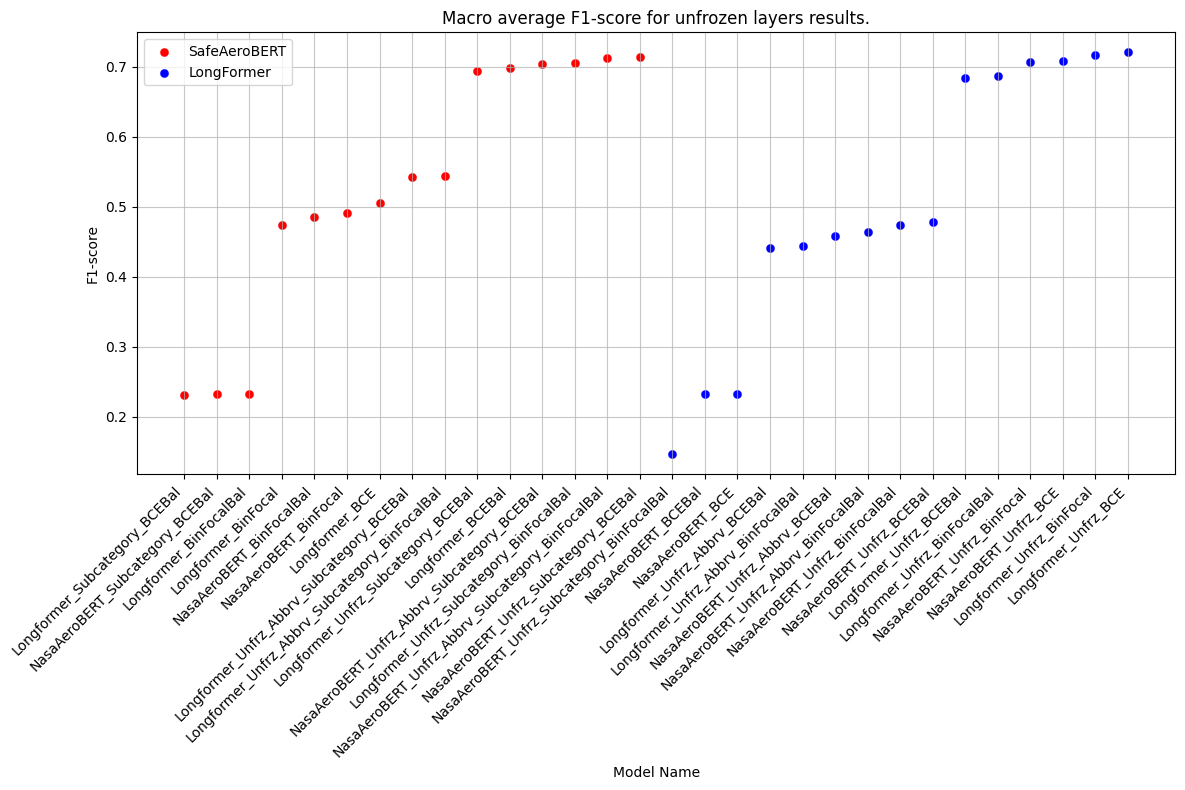

In [180]:
import matplotlib.pyplot as plt

# Loss BCE, FocalLoss, balanced, or unbalanced
filtered_models = results[((results["Model"] == "SafeAeroBERT") | (results["Model"] == "LongFormer")) & (results["Category"] == "macro avg")].sort_values(by="f1-score")
x_values = filtered_models["Short_name"]
y_values = filtered_models["f1-score"]
model_types = filtered_models["Model"]

# Abbreviations visualization 
plt.figure(figsize=(12, 8))

# Scatter plot with red and blue colors for different model types
for model_type in set(model_types):
    color = "red" if model_type == "SafeAeroBERT" else "blue"
    plt.scatter(x_values[model_types == model_type], y_values[model_types == model_type], marker='o', linewidths=0.2, color=color, label=model_type)

# Rotate x-axis labels for better readability
plt.xticks(range(len(x_values)), x_values, rotation=45, ha='right')

# Labeling the axes and the plot
plt.xlabel('Model Name')
plt.ylabel('F1-score')
plt.title('Macro average F1-score for unfrozen layers results.')
plt.grid(alpha=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## Boxplot for Frozen vs Unfrozen


## Old codes


/tmp/ipykernel_30384/2546901956.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=results_filtered, palette=palette)


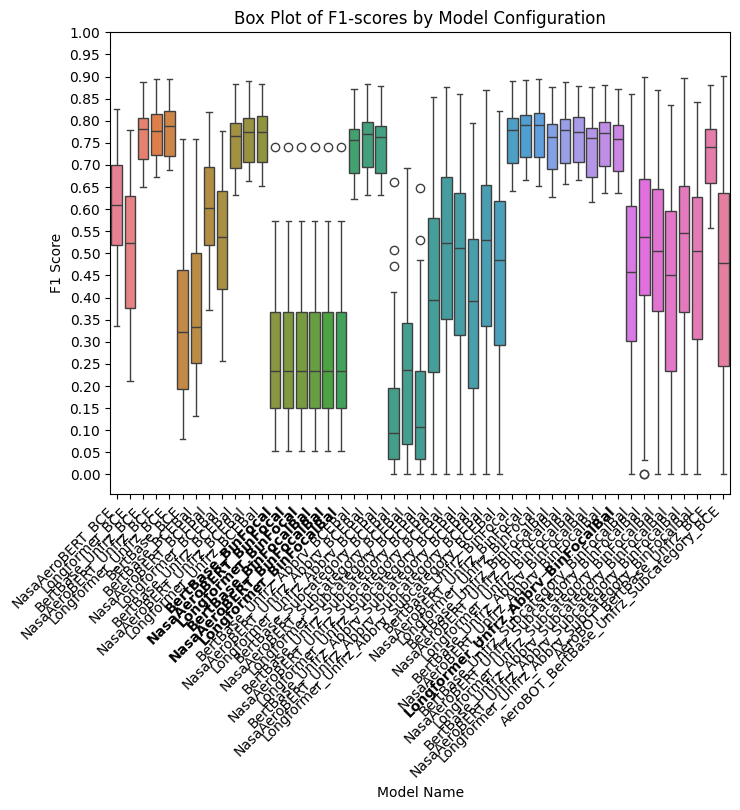

In [185]:
######################################################
# Plot of the F1-score for all model configurations
######################################################

# Filter out this outlier class 'No specific anomoly occurred' 
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=results_filtered, palette=palette)
plt.title('Box Plot of F1-scores by Model Configuration')
plt.ylabel('F1 Score')

y_ticks = np.arange(0, 1.05, 0.05)

# Formatting xticks to make the ticks with deviating results bold
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
for i, tick in enumerate(plt.gca().get_xticklabels()):
    if xticks[i] in ['BertBase_BinFocal', 'NasaAeroBERT_BinFocal', 'Longformer_BinFocal', 'BertBase_BinFocalBal', 'NasaAeroBERT_BinFocalBal', 'Longformer_BinFocalBal', 'Longformer_Unfrz_Abbrv_BinFocalBal' ]:
        tick.set_fontweight('bold')

plt.yticks(y_ticks)
plt.show()


Text(0, 0.5, 'F1-Score')

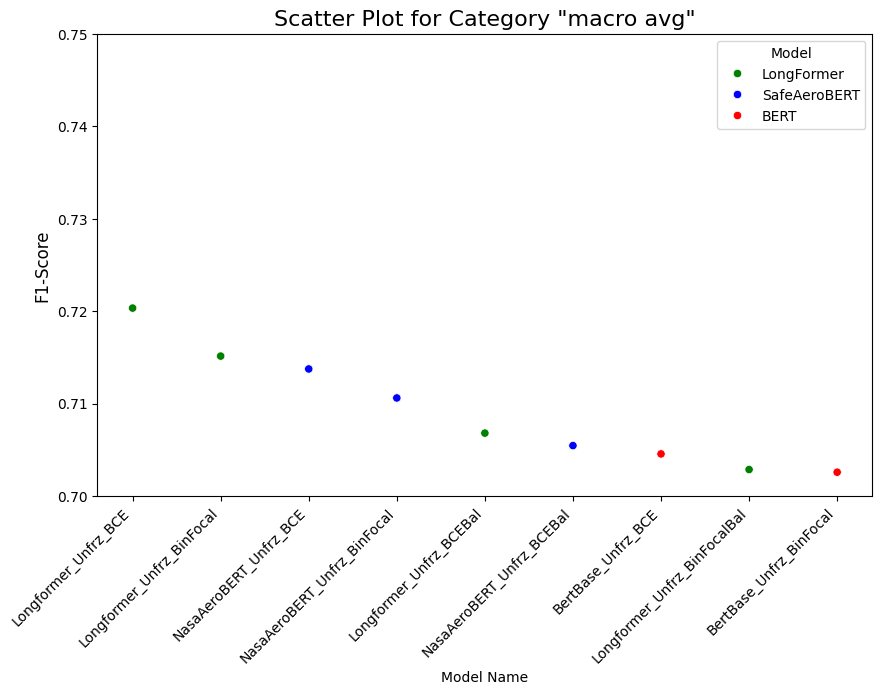

In [104]:
import numpy as np

############################################################
# Plot of the F1-score for the 10 best model configurations
############################################################

# Select best performing models
top_models = 10 
results_macro_avg = results[results["Category"] == 'macro avg']
results_macro_avg = results_macro_avg.sort_values("f1-score", ascending = False)[0:(top_models-1)]

# Create new x-axis labels
unique_categories = results_macro_avg["Model Name"].unique().tolist()
xticks_filtered = [shorten_model_name(name) for name in unique_categories]

custom_palette = {"BERT": 'red', "LongFormer": 'green', "SafeAeroBERT": 'blue'}
plt.figure(figsize=(10,6))
sns.scatterplot(x='Model Name', y = 'f1-score', data = results_macro_avg, hue="Model",palette = custom_palette)
plt.title('Scatter Plot for Category "macro avg"', fontsize=16)

y_ticks = np.arange(0.7, 0.75, 0.01)
plt.xticks(range(len(xticks_filtered)), xticks_filtered, rotation=45, ha='right')
plt.yticks(y_ticks)
plt.ylabel('F1-Score', fontsize=12)

/tmp/ipykernel_150523/946109520.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=df_abb, palette=palette)


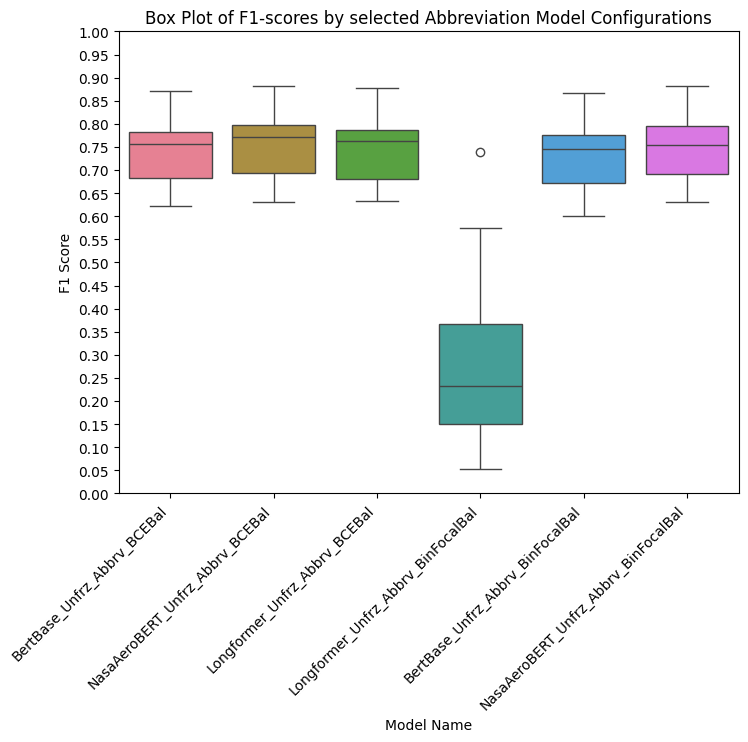

In [124]:
###############################################
# Plot of the abbreviated data
###############################################

# Filter outliers
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

# Split dataset in abbreviated and non-abbreviated models
substring_abb = 'Abbreviated'  
df_abb = results_filtered[results_filtered['Model Name'].str.contains(substring_abb)]

df_without_abb_= df_abb[~df_abb.index.isin(df_abb.index)]

# Create new x-axis labels
unique_categories = df_abb["Model Name"].unique().tolist()
xticks = [shorten_model_name(name) for name in unique_categories]

# Create graph abbreviated 
palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=df_abb, palette=palette)
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
y_ticks = np.arange(0, 1.05, 0.05)
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
plt.yticks(y_ticks)

plt.show()



/tmp/ipykernel_150523/602877426.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Name', y='f1-score', data=df_without_abb, palette=palette)


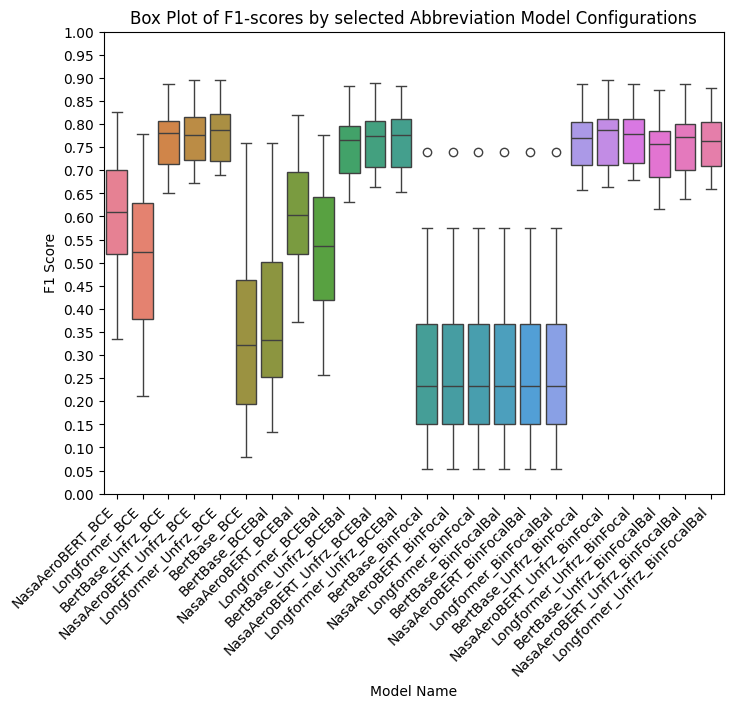

In [128]:
###############################################
# Plot of the non abbreviated data
###############################################

# Filter outliers
results_filtered = results[results['Category'] != 'No Specific Anomaly Occurred']

# Split dataset in abbreviated and non-abbreviated models
df_without_abb_= df_abb[~df_abb.index.isin(df_abb.index)]

# Create new x-axis labels
unique_categories = df_without_abb["Model Name"].unique().tolist()
xticks = [shorten_model_name(name) for name in unique_categories]

# Create graph abbreviated 
palette = sns.color_palette("husl", len(xticks))
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Name', y='f1-score', data=df_without_abb, palette=palette)
plt.title('Box Plot of F1-scores by selected Abbreviation Model Configurations')
plt.ylabel('F1 Score')
y_ticks = np.arange(0, 1.05, 0.05)
plt.xticks(range(len(xticks)), xticks, rotation=45, ha='right')
plt.yticks(y_ticks)

plt.show()

In [ ]:
exclude_categories = ['micro avg', 'macro avg', 'weighted avg', 'samples avg']
filtered_df = results[~results['Category'].isin(exclude_categories)]